In [183]:
#importing libraries

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [184]:
#loading dataset
df= pd.read_csv('googleplaystore.csv')

In [185]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,...,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",...,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",...,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",...,0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",...,0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",...,0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


In [186]:
df.shape

(10841, 13)

In [187]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [188]:
##cleaning size feature

def change_function(size) :
    if 'M'in size: 
        x= size[:-1]
        x= float(x)*1000
        return(x)
    elif 'K'  in size :
        x= size[:-1]
        x= float(x)
        return(x) 
    else :
        return None 

In [189]:
df['Size']=df['Size'].map(change_function)

In [190]:
df['Size'] 

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10836    53000.0
10837     3600.0
10838     9500.0
10839        NaN
10840    19000.0
Name: Size, Length: 10841, dtype: float64

In [191]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10841, dtype: object

In [192]:
##cleaning 'Install' feature
def clean_installs(installs):
    return int(installs.replace(",","").replace("+",""))

In [193]:
df[df['Installs']== 'Free']

,App,Category,Rating,Reviews,Size,Installs,...,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,NaN,Free,...,Everyone,NaN,"February_11,_2018",1.0.19,4.0 and up,NaN


In [194]:
df=df.drop(df.index[10472])

In [195]:
df.reset_index(inplace=True) 

In [196]:
df["Installs"].value_counts() 

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [197]:
df['Installs']=df['Installs'].map(clean_installs)

In [198]:
pd.options.display.max_rows=1000

In [199]:
df.head()

,index,App,Category,Rating,Reviews,Size,...,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,...,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,...,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,...,0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,...,0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,...,0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


In [200]:
df['Rating'].isnull().sum()    #finding null values in " Rating "

1474

In [201]:
df.dropna(inplace=True)

In [202]:
df['Rating'].isnull().sum()

0

In [203]:
df['Price'].value_counts() 

0          6940
$2.99        98
$0.99        93
$4.99        50
$1.99        49
$3.99        39
$1.49        23
$2.49        17
$9.99        16
$5.99        13
$399.99      10
$14.99        9
$4.49         8
$6.99         8
$7.99         7
$29.99        6
$3.49         6
$24.99        5
$19.99        5
$11.99        4
$12.99        4
$16.99        3
$10.00        3
$8.99         2
$1.70         2
$17.99        2
$33.99        2
$79.99        2
$5.49         2
$9.00         2
$13.99        1
$2.00         1
$3.08         1
$2.59         1
$19.40        1
$15.46        1
$3.04         1
$39.99        1
$4.29         1
$14.00        1
$4.60         1
$1.00         1
$10.99        1
$2.90         1
$1.97         1
$2.56         1
$3.28         1
$8.49         1
$1.75         1
$389.99       1
$15.99        1
$1.50         1
$7.49         1
$3.88         1
$400.00       1
$3.02         1
$1.76         1
$4.84         1
$4.77         1
$1.61         1
$1.59         1
$299.99       1
$379.99 

In [204]:
def clean_price(doller):
    return float(doller.replace("$",""))

In [205]:
df['Price']=df['Price'].map(clean_price)

In [206]:
df["Price"].value_counts()

0.00      6940
2.99        98
0.99        93
4.99        50
1.99        49
3.99        39
1.49        23
2.49        17
9.99        16
5.99        13
399.99      10
14.99        9
4.49         8
6.99         8
7.99         7
29.99        6
3.49         6
24.99        5
19.99        5
11.99        4
12.99        4
16.99        3
10.00        3
8.99         2
1.70         2
17.99        2
33.99        2
79.99        2
5.49         2
9.00         2
13.99        1
2.00         1
3.08         1
2.59         1
19.40        1
15.46        1
3.04         1
39.99        1
4.29         1
14.00        1
4.60         1
1.00         1
10.99        1
2.90         1
1.97         1
2.56         1
3.28         1
8.49         1
1.75         1
389.99       1
15.99        1
1.50         1
7.49         1
3.88         1
400.00       1
3.02         1
1.76         1
4.84         1
4.77         1
1.61         1
1.59         1
299.99       1
379.99       1
37.99        1
18.99        1
1.20         1
Name: Pric

In [207]:
df.head(10)

,index,App,Category,Rating,Reviews,Size,...,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,...,0.0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,...,0.0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,...,0.0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,...,0.0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,...,0.0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,...,0.0,Everyone,Art_&_Design,"March 26, 2017",1,2.3 and up
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,...,0.0,Everyone,Art_&_Design,"April 26, 2018",1.1,4.0.3 and up
7,7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,...,0.0,Everyone,Art_&_Design,"June 14, 2018",6.1.61.1,4.2 and up
8,8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,...,0.0,Everyone,Art_&_Design,"September 20, 2017",2.9.2,3.0 and up
9,9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,...,0.0,Everyone,Art_&_Design_Creativity,"July 3, 2018",2.8,4.0.3 and up


In [208]:
df=df.drop(columns='index',axis=1)

In [209]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,...,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,...,0.0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,...,0.0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,...,0.0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,...,0.0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,...,0.0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,...,0.0,Everyone,Art_&_Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,...,0.0,Everyone,Art_&_Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,...,0.0,Everyone,Art_&_Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,...,0.0,Everyone,Art_&_Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,10000,...,0.0,Everyone,Art_&_Design_Creativity,"July 3, 2018",2.8,4.0.3 and up


In [210]:
df['Type'].value_counts() 

Free    6940
Paid     526
Name: Type, dtype: int64

In [211]:
df['Size'].describe()

count      7466.000000
mean      23746.316635
std       23467.457006
min        1000.000000
25%        5900.000000
50%       15000.000000
75%       34000.000000
max      100000.000000
Name: Size, dtype: float64

<AxesSubplot: >

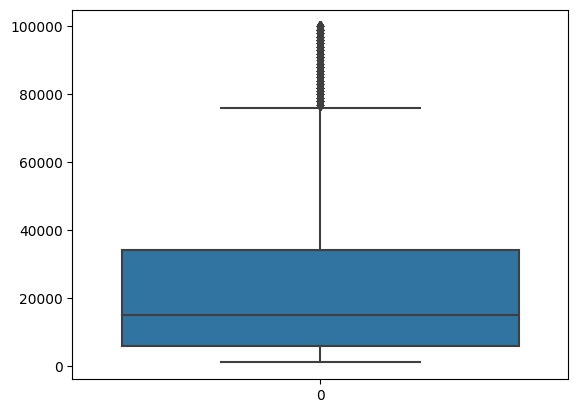

In [212]:
sns.boxplot(df['Size']) #Chacking Outlairs

In [213]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [214]:
df['Rating'].describe()  

count    7466.000000
mean        4.179842
std         0.544287
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7466 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7466 non-null   object 
 1   Category        7466 non-null   object 
 2   Rating          7466 non-null   float64
 3   Reviews         7466 non-null   object 
 4   Size            7466 non-null   float64
 5   Installs        7466 non-null   int64  
 6   Type            7466 non-null   object 
 7   Price           7466 non-null   float64
 8   Content_Rating  7466 non-null   object 
 9   Genres          7466 non-null   object 
 10  Last Updated    7466 non-null   object 
 11  Current Ver     7466 non-null   object 
 12  Android Ver     7466 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [216]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10829       881
10833         7
10835        38
10836         4
10839    398307
Name: Reviews, Length: 7466, dtype: object

In [217]:
df['Reviews']=df['Reviews'].astype(int)

In [218]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10829       881
10833         7
10835        38
10836         4
10839    398307
Name: Reviews, Length: 7466, dtype: int32

In [219]:
df[df['Reviews']>df["Installs"]]

,App,Category,Rating,Reviews,Size,Installs,...,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,...,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,...,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,...,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,...,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,...,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10696,Mu.F.O.,GAME,5.0,2,16000.0,1,...,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


In [220]:
len(df[df['Reviews']>df["Installs"]])

6

In [221]:
df= df[df['Reviews']<df["Installs"]]

In [222]:
df

,App,Category,Rating,Reviews,Size,Installs,...,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,...,0.0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,...,0.0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,...,0.0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,...,0.0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,...,0.0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2300.0,100000,...,0.0,Everyone,News_&_Magazines,"January 20, 2014",1.5,1.6 and up
10833,FR Calculator,FAMILY,4.0,7,2600.0,500,...,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,...,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,...,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up


In [223]:
df[df['Reviews']>df["Installs"]].sum()

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content_Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

In [224]:
df[((df["Type"]=='Free')&(df["Price"]>0))].sum()

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content_Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

<AxesSubplot: xlabel='Price'>

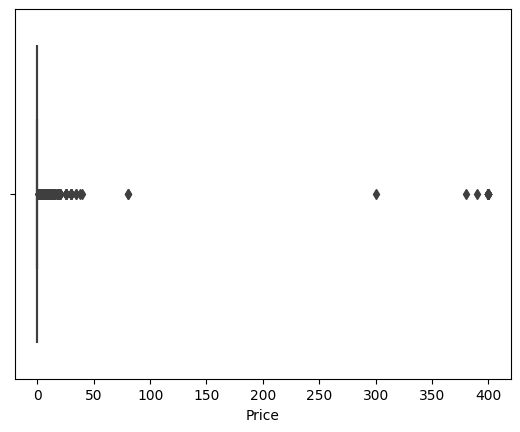

In [225]:
sns.boxplot(data=df,x="Price")

<AxesSubplot: xlabel='Reviews'>

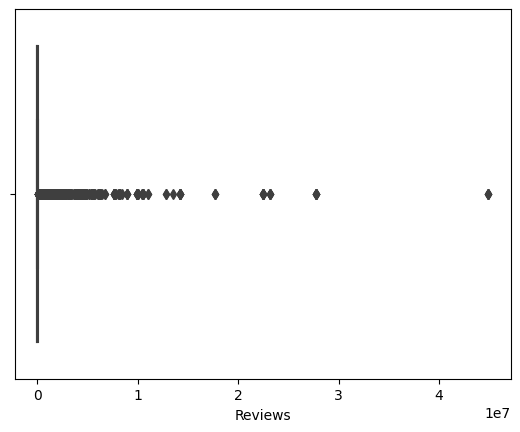

In [226]:
sns.boxplot(data=df,x="Reviews")

In [227]:
pd.set_option('display.max_columns', 12)

In [228]:
pd.set_option('display.max_rows', 8)

In [229]:
df

,App,Category,Rating,Reviews,Size,Installs,...,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,...,0.0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,...,0.0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,...,0.0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,...,0.0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,FR Calculator,FAMILY,4.0,7,2600.0,500,...,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,...,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,...,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,10000000,...,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


out lair treatment



<AxesSubplot: >

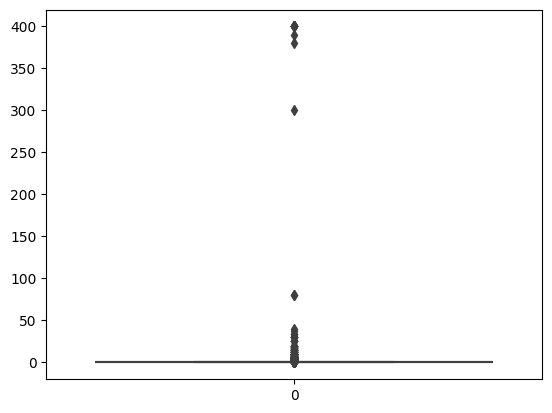

In [230]:
sns.boxplot(data=df['Price'])

In [231]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,...,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,...,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,...,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,...,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,...,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,I am rich (Most expensive app),FINANCE,4.1,129,2700.0,1000,...,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
5366,I Am Rich,FAMILY,3.6,217,4900.0,10000,...,389.99,Everyone,Entertainment,"June 22, 2018",1.5,4.2 and up
5369,I am Rich,FINANCE,4.3,180,3800.0,5000,...,399.99,Everyone,Finance,"March 22, 2018",1,4.2 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41000.0,1000,...,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up


Price

From the box plot, it seems like there are some apps with very high prices. A price of $200 for an application on the Play Store is very high and suspicious.
Check the records that have very high price:
Is 200 a high price?

In [232]:
df['Price']=df['Price']<200

In [233]:
df

,App,Category,Rating,Reviews,Size,Installs,...,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,...,True,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,...,True,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,...,True,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,...,True,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,FR Calculator,FAMILY,4.0,7,2600.0,500,...,True,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,...,True,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,...,True,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,10000000,...,True,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


<AxesSubplot: ylabel='Frequency'>

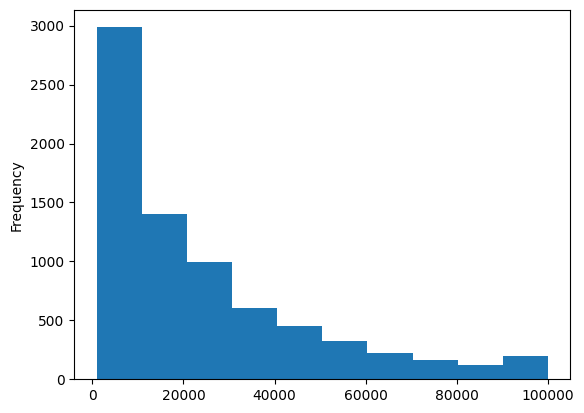

In [234]:
df['Size'].plot.hist()

In [235]:
df['Reviews'].describe()

count    7.458000e+03
mean     3.051596e+05
std      1.895950e+06
min      1.000000e+00
25%      1.180000e+02
50%      2.655500e+03
75%      4.190450e+04
max      4.489389e+07
Name: Reviews, dtype: float64

In [236]:
df=df[df.Reviews<2000000]    #droping reviews which are more than 2 millon

In [237]:
df['Installs'].quantile([0.1,0.25,0.5,0.6,0.7,0.8,0.9,0.95,1])  #Dropping the apps that have a very high number of installs

0.10    1.000000e+03
0.25    1.000000e+04
0.50    1.000000e+05
0.60    5.000000e+05
            ...     
0.80    5.000000e+06
0.90    1.000000e+07
0.95    1.000000e+07
1.00    1.000000e+09
Name: Installs, Length: 9, dtype: float64

In [238]:
#observation
#Looks like there are just 1% of apps having more than 100M installs. These apps might be genuine, but will definitely skew our analysis.  
#We need to drop these.


In [239]:
df[df['Installs']>=1000000000]

,App,Category,Rating,Reviews,Size,Installs,...,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000.0,1000000000,...,True,Teen,News_&_Magazines,"August 1, 2018",5.2.0,4.4 and up
3765,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000.0,1000000000,...,True,Teen,News_&_Magazines,"August 1, 2018",5.2.0,4.4 and up
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643,13000.0,1000000000,...,True,Teen,News_&_Magazines,"August 1, 2018",5.2.0,4.4 and up
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13000.0,1000000000,...,True,Teen,News_&_Magazines,"August 1, 2018",5.2.0,4.4 and up


In [240]:
df=df[df['Installs']<=1000000000]

In [241]:
#bi-variate analysis

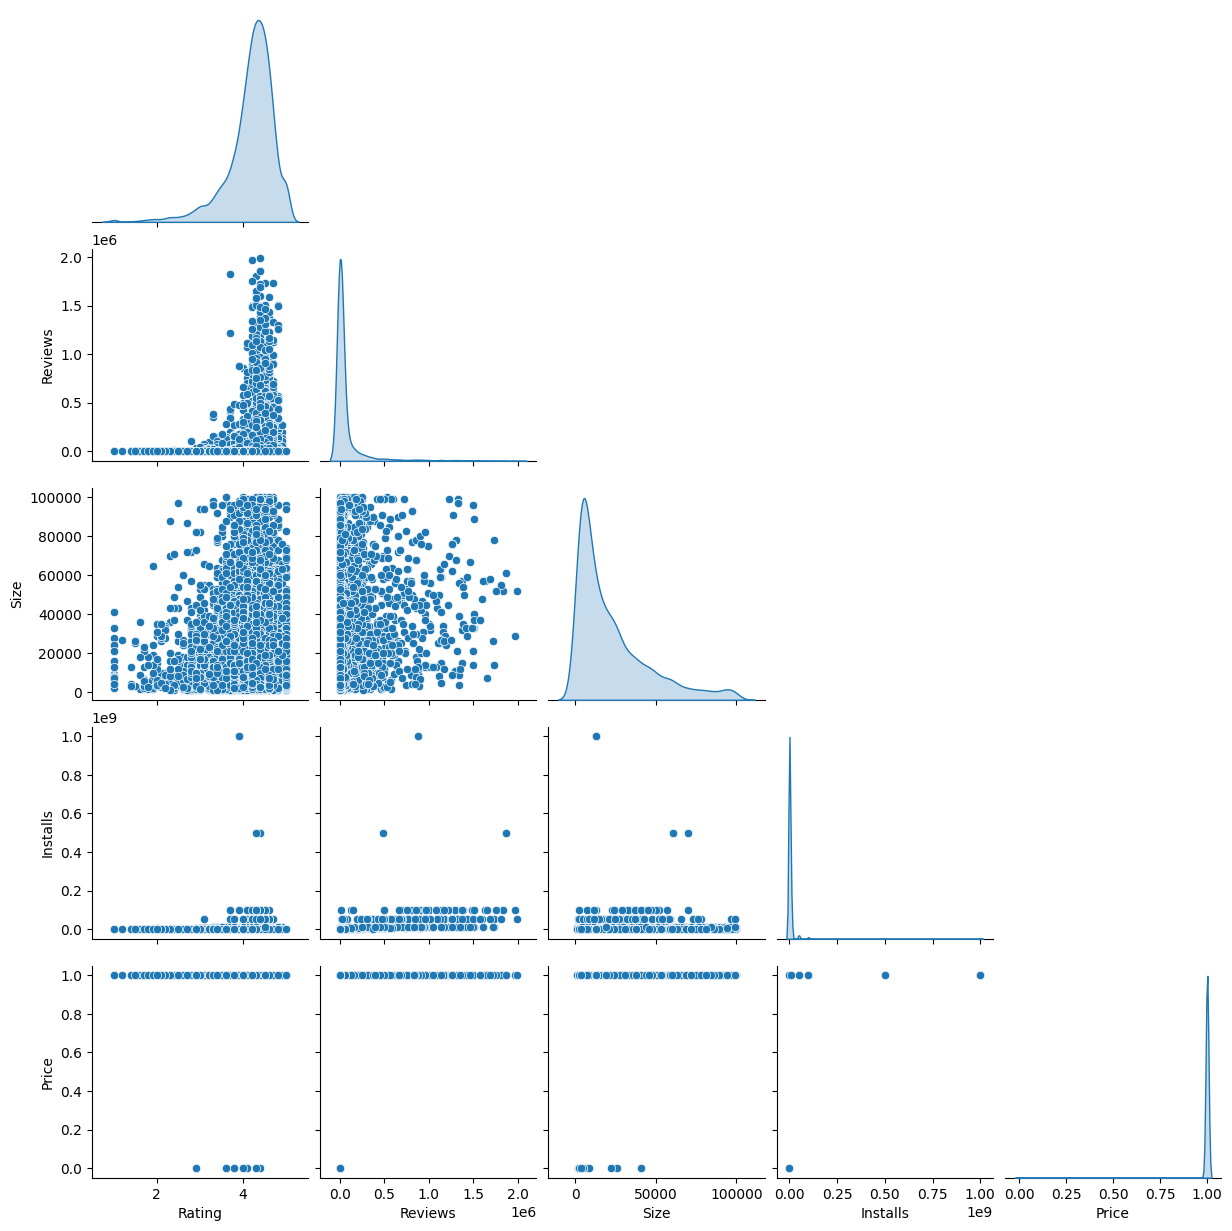

In [242]:
sns.pairplot(data=df,diag_kind='kde',corner=True)

In [243]:
#rating vs price

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


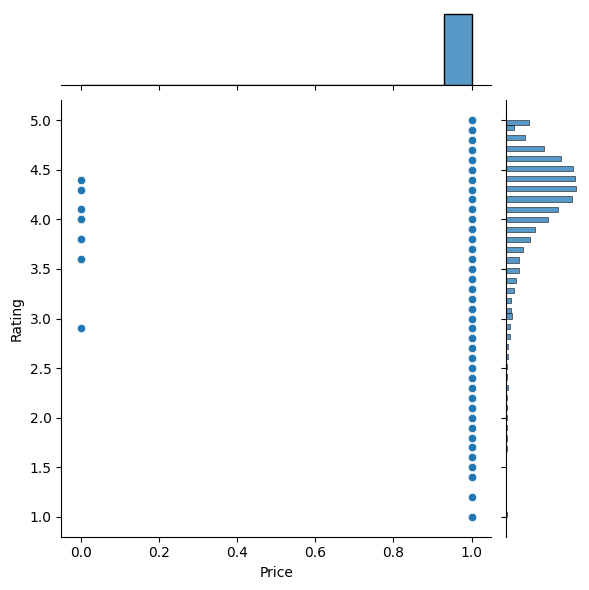

In [244]:
sns.jointplot(data=df, x= 'Price', y= 'Rating')

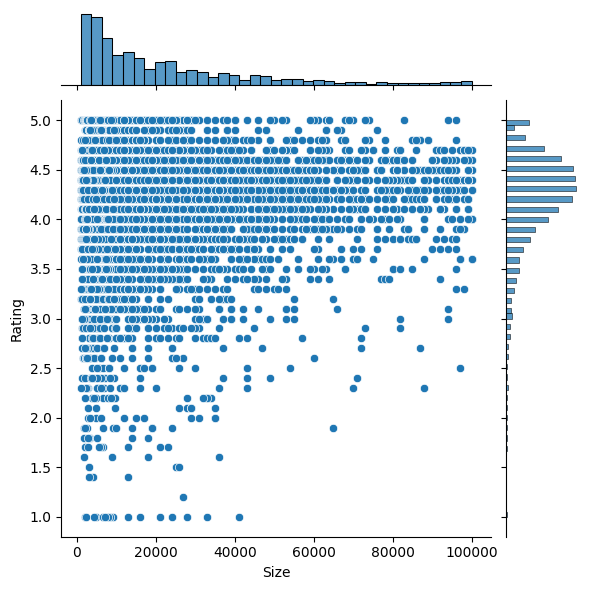

In [245]:
sns.jointplot(data=df, x= 'Size', y= 'Rating')

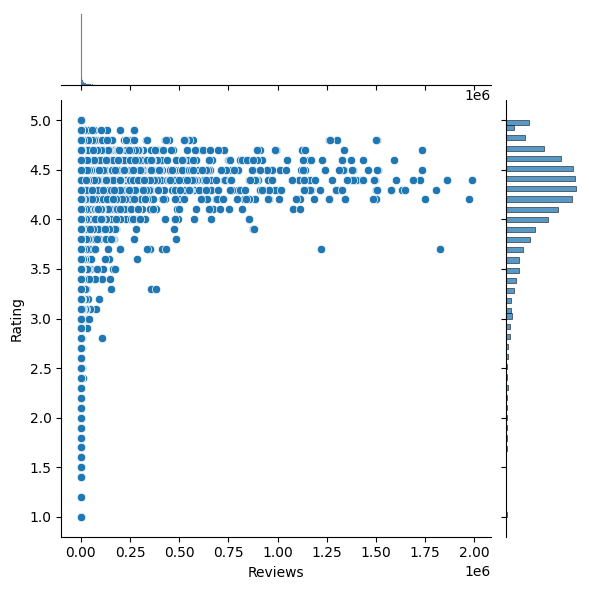

In [246]:
sns.jointplot(data=df, x= 'Reviews', y= 'Rating')

<AxesSubplot: xlabel='Content_Rating', ylabel='Rating'>

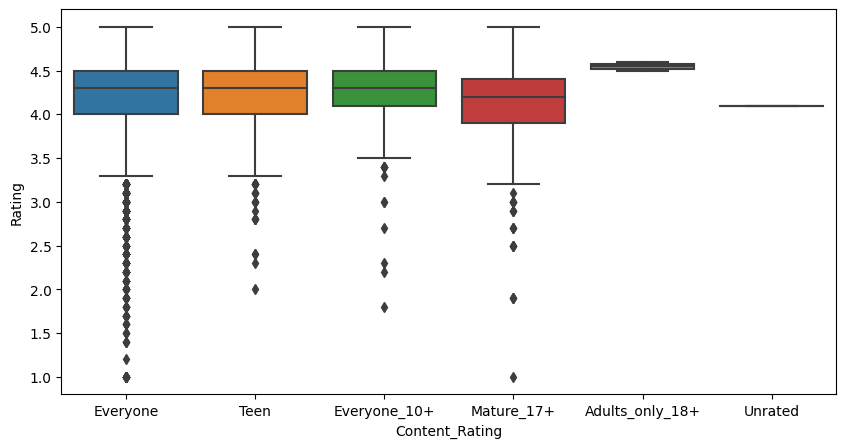

In [247]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x=df['Content_Rating'],y=df['Rating'])

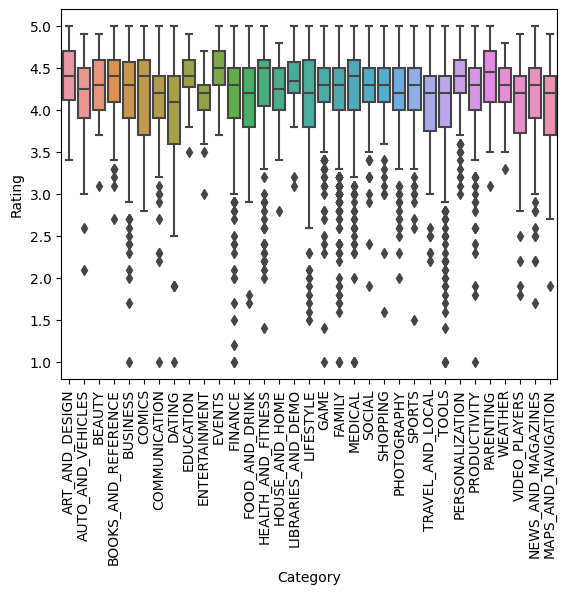

In [248]:
sns.boxplot(data=df,x=df['Category'],y=df['Rating'])
plt.xticks(rotation=90)
plt.show()

In [249]:
inp1= df.copy()

In [250]:
df.Installs.describe()   #reducing the skew by log transformation

count    7.239000e+03
mean     4.062797e+06
std      2.827401e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

<AxesSubplot: >

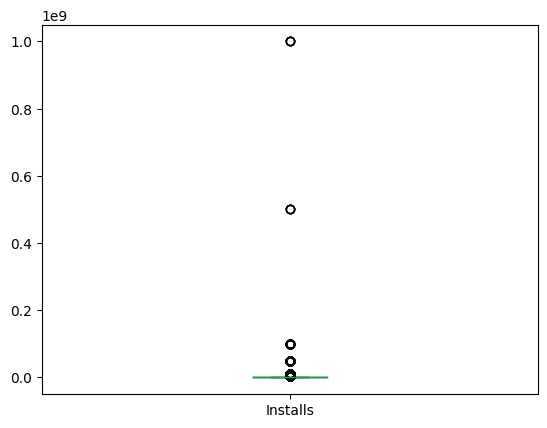

In [251]:
df["Installs"].plot(kind='box')

In [252]:
inp1['Installs']= inp1["Installs"].apply(np.log1p)

In [253]:
inp1['Reviews']= inp1["Reviews"].apply(np.log1p)

<AxesSubplot: xlabel='Installs'>

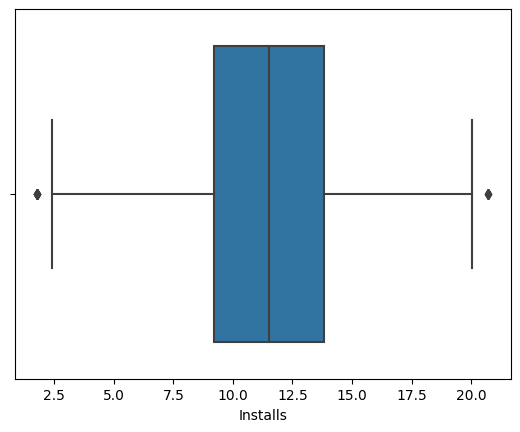

In [254]:
sns.boxplot(data=inp1, x='Installs')

<AxesSubplot: xlabel='Reviews'>

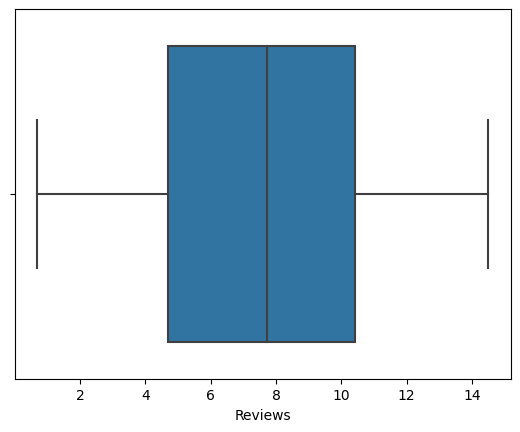

In [255]:
sns.boxplot(data=inp1, x='Reviews')

<AxesSubplot: xlabel='Reviews', ylabel='Density'>

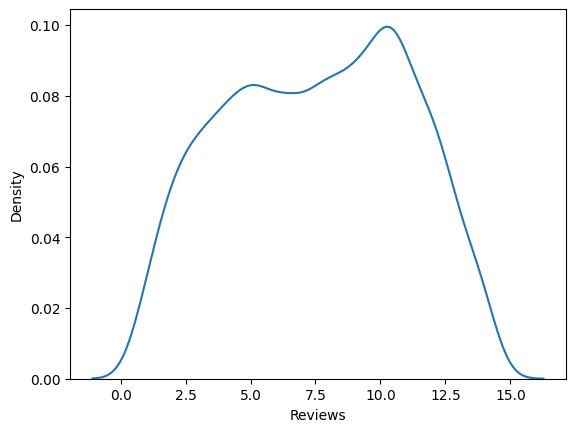

In [256]:
sns.kdeplot(data=inp1,x='Reviews')

<AxesSubplot: xlabel='Reviews', ylabel='Density'>

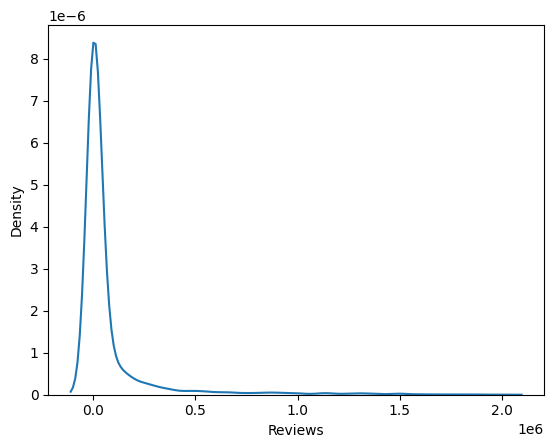

In [257]:
sns.kdeplot(data=df,x='Reviews')

In [258]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,...,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,...,True,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,...,True,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,...,True,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,...,True,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,...,True,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


Drop columns App, Last Updated, Current Ver, and Android Ver**

These variables are not useful for our task.

In [259]:
inp1.dtypes

App              object
Category         object
Rating          float64
Reviews         float64
                 ...   
Genres           object
Last Updated     object
Current Ver      object
Android Ver      object
Length: 13, dtype: object

In [260]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [261]:
inp1.drop(   ['Last Updated', 'Current Ver',
       'Android Ver','App'] , axis=1, inplace=True     )

In [262]:
inp1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,True,Everyone,Art_&_Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,True,Everyone,Art_&_Design_Pretend_Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,True,Everyone,Art_&_Design
3,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,True,Teen,Art_&_Design
...,...,...,...,...,...,...,...,...,...
10833,FAMILY,4.0,2.079442,2600.0,6.216606,Free,True,Everyone,Education
10835,FAMILY,4.5,3.663562,53000.0,8.517393,Free,True,Everyone,Education
10836,FAMILY,5.0,1.609438,3600.0,4.615121,Free,True,Everyone,Education
10839,LIFESTYLE,4.5,12.894981,19000.0,16.118096,Free,True,Everyone,Lifestyle


In [263]:
inp1.select_dtypes(include='object')

,Category,Type,Content_Rating,Genres
0,ART_AND_DESIGN,Free,Everyone,Art_&_Design
1,ART_AND_DESIGN,Free,Everyone,Art_&_Design_Pretend_Play
2,ART_AND_DESIGN,Free,Everyone,Art_&_Design
3,ART_AND_DESIGN,Free,Teen,Art_&_Design
...,...,...,...,...
10833,FAMILY,Free,Everyone,Education
10835,FAMILY,Free,Everyone,Education
10836,FAMILY,Free,Everyone,Education
10839,LIFESTYLE,Free,Everyone,Lifestyle


In [264]:
inp2= pd.get_dummies(inp1,drop_first=True)

In [265]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Strategy_Education', 'Genres_Tools', 'Genres_Travel_&_Local',
       'Genres_Travel_&_Local_Action_&_Adventure', 'Genres_Trivia',
       'Genres_Video_Players_&_Editors',
       'Genres_Video_Players_&_Editors_Creativity',
       'Genres_Video_Players_&_Editors_Music_&_Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=154)

In [266]:
inp2.shape

(7239, 154)

In [267]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# inp1['Category'] = le.fit_transform(inp1['Category'])

In [268]:
inp2.dtypes

Rating                                          float64
Reviews                                         float64
Size                                            float64
Installs                                        float64
                                                 ...   
Genres_Video_Players_&_Editors_Creativity         uint8
Genres_Video_Players_&_Editors_Music_&_Video      uint8
Genres_Weather                                    uint8
Genres_Word                                       uint8
Length: 154, dtype: object

# Train - Test Split

Let us distribute the data into **training** and **test** datasets using the **train_test_split()** function.

In [269]:
from sklearn.model_selection import train_test_split 

In [270]:
df_train, df_test = train_test_split(inp2,train_size=0.7, random_state= 100 )

In [271]:
df_train.shape , df_test.shape

((5067, 154), (2172, 154))

Let us separate the dataframes into **X_train, y_train, X_test, y_test.**

In [272]:
y_train= df_train["Rating"]

In [273]:
x_train=df_train.drop('Rating',axis=1)

In [274]:
x_train.head()

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
8465,6.680855,28000.0,11.512935,True,0,0,...,0,0,0,0,0,0
2392,7.161622,38000.0,11.512935,True,0,0,...,0,0,0,0,0,0
5203,3.295837,3800.0,6.216606,True,0,0,...,0,0,0,0,0,0
9948,3.806662,41000.0,9.210440,True,0,0,...,0,0,0,0,0,0
249,11.272928,22000.0,13.815512,True,0,0,...,0,0,0,0,0,0


In [275]:
y_train.head()

8465    4.3
2392    3.5
5203    4.4
9948    2.8
249     4.5
Name: Rating, dtype: float64

In [276]:
y_test= df_test["Rating"]

In [277]:
x_test = df_test.drop('Rating',axis=1)

In [278]:
y_test.head

<bound method NDFrame.head of 1827    4.2
8788    3.7
9564    4.6
5156    4.0
       ... 
4275    4.5
6130    4.7
6484    5.0
9783    3.3
Name: Rating, Length: 2172, dtype: float64>

In [279]:
x_test.head()

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
1827,7.628518,96000.0,11.512935,True,0,0,...,0,0,0,0,0,0
8788,9.371523,36000.0,13.815512,True,0,0,...,0,0,0,0,0,0
9564,11.991790,73000.0,15.424949,True,0,0,...,0,0,0,0,0,0
5156,1.609438,27000.0,6.216606,True,0,0,...,0,0,0,0,0,0
7009,7.154615,13000.0,11.512935,True,0,0,...,0,0,0,0,0,0


# Regression Algorithms

* Linear regression
* Multiple linear regression
* Polynomial regression
* Ridge regression
* Lasso regression
* ElasticNet regression

In [280]:
from statsmodels.api import OLS


In [281]:
x_train

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
8465,6.680855,28000.0,11.512935,True,0,0,...,0,0,0,0,0,0
2392,7.161622,38000.0,11.512935,True,0,0,...,0,0,0,0,0,0
5203,3.295837,3800.0,6.216606,True,0,0,...,0,0,0,0,0,0
9948,3.806662,41000.0,9.210440,True,0,0,...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,4.189655,13000.0,8.517393,True,0,0,...,0,0,0,0,0,0
8914,8.432942,2500.0,11.512935,True,0,0,...,0,0,0,0,0,0
10326,2.995732,11000.0,6.216606,True,0,0,...,0,0,0,0,0,0
8485,8.817742,3300.0,13.815512,True,0,0,...,0,0,0,0,0,0


In [282]:
x_test

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
1827,7.628518,96000.0,11.512935,True,0,0,...,0,0,0,0,0,0
8788,9.371523,36000.0,13.815512,True,0,0,...,0,0,0,0,0,0
9564,11.991790,73000.0,15.424949,True,0,0,...,0,0,0,0,0,0
5156,1.609438,27000.0,6.216606,True,0,0,...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,5.105945,33000.0,9.210440,True,0,0,...,0,0,0,0,0,0
6130,3.135494,11000.0,6.908755,True,0,0,...,0,0,0,0,0,0
6484,1.386294,9300.0,4.615121,True,0,0,...,0,0,0,0,0,0
9783,9.254357,29000.0,13.815512,True,0,0,...,0,0,0,0,0,0


In [283]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
x_test['Price']= le.fit_transform(x_test['Price'])

In [284]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# inp1['Category'] = le.fit_transform(inp1['Category'])


In [285]:
x_test

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
1827,7.628518,96000.0,11.512935,1,0,0,...,0,0,0,0,0,0
8788,9.371523,36000.0,13.815512,1,0,0,...,0,0,0,0,0,0
9564,11.991790,73000.0,15.424949,1,0,0,...,0,0,0,0,0,0
5156,1.609438,27000.0,6.216606,1,0,0,...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,5.105945,33000.0,9.210440,1,0,0,...,0,0,0,0,0,0
6130,3.135494,11000.0,6.908755,1,0,0,...,0,0,0,0,0,0
6484,1.386294,9300.0,4.615121,1,0,0,...,0,0,0,0,0,0
9783,9.254357,29000.0,13.815512,1,0,0,...,0,0,0,0,0,0


In [286]:
x_train['Price']= le.fit_transform(x_train['Price'])

In [287]:
x_train

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
8465,6.680855,28000.0,11.512935,1,0,0,...,0,0,0,0,0,0
2392,7.161622,38000.0,11.512935,1,0,0,...,0,0,0,0,0,0
5203,3.295837,3800.0,6.216606,1,0,0,...,0,0,0,0,0,0
9948,3.806662,41000.0,9.210440,1,0,0,...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,4.189655,13000.0,8.517393,1,0,0,...,0,0,0,0,0,0
8914,8.432942,2500.0,11.512935,1,0,0,...,0,0,0,0,0,0
10326,2.995732,11000.0,6.216606,1,0,0,...,0,0,0,0,0,0
8485,8.817742,3300.0,13.815512,1,0,0,...,0,0,0,0,0,0


In [288]:
x_train.dtypes

Reviews                                         float64
Size                                            float64
Installs                                        float64
Price                                             int64
                                                 ...   
Genres_Video_Players_&_Editors_Creativity         uint8
Genres_Video_Players_&_Editors_Music_&_Video      uint8
Genres_Weather                                    uint8
Genres_Word                                       uint8
Length: 153, dtype: object

In [289]:
from statsmodels.api import OLS

In [290]:
modl1= OLS(y_train,x_train)

In [291]:
modl1= modl1.fit()

In [292]:
#Finding the summary
modl1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     7.661
Date:                Sat, 22 Oct 2022   Prob (F-statistic):          4.57e-110
Time:                        19:26:57   Log-Likelihood:                -3742.1
No. Observations:                5067   AIC:                             7724.
Df Residuals:                    4947   BIC:                             8508.
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1776      0.007     24.482      0.000       0.163       0.192
Size                                         -7.228e-07   4.01e-07     -1.802      0.072   -1.51e-06    6.37e-08
Installs                                        -0.1543      0.007    -21.577      0.000      -0.168      -0.140
Price                                            0.2056      0.198      1.039      0.299      -0.182       0.594
Category_AUTO_AND_VEHICLES                       2.4114      0.282      8.554      0.000       1.859       2.964
Category_BEAUTY                                  2.4944      0.284      8.795      0.000       1.938       3.050
Category_BOOKS_AND_REFERENCE                     2.4208      0.281      8.630      0.000       1.871       2.971
Category_BUSINESS                                2.3510      0.280      8.399      0.000       1.802       2.900
Category_COMICS                                  2.3160      0.275      8.411      0.000       1.776       2.856
Category_COMMUNICATION                           2.2732      0.280      8.111      0.000       1.724       2.823
Category_DATING                                  2.2126      0.281      7.883      0.000       1.662       2.763
Category_EDUCATION                               4.4856      0.570      7.871      0.000       3.368       5.603
Category_ENTERTAINMENT                           4.3726      0.571      7.657      0.000       3.253       5.492
Category_EVENTS                                  2.5247      0.284      8.903      0.000       1.969       3.081
Category_FAMILY                                  4.4829      0.565      7.931      0.000       3.375       5.591
Category_FINANCE                                 2.3272      0.279      8.343      0.000       1.780       2.874
Category_FOOD_AND_DRINK                          2.3259      0.281      8.265      0.000       1.774       2.878
Category_GAME                                    4.6326      0.560      8.271      0.000       3.535       5.731
Category_HEALTH_AND_FITNESS                      2.3690      0.280      8.458      0.000       1.820       2.918
Category_HOUSE_AND_HOME                          2.3854      0.282      8.454      0.000       1.832       2.938
Category_LIBRARIES_AND_DEMO                      2.4949      0.284      8.795      0.000       1.939       3.051
Category_LIFESTYLE                               3.0612      0.410      7.465      0.000       2.257       3.865
Category_MAPS_AND_NAVIGATION                     2.2714      0.281      8.083      0.000       1.720       2.822
Category_MEDICAL                                 2.3718      0.280      8.473      0.000       1.823       2.921
Category_NEWS_AND_MAGAZINES     

## Prediction and evaluation using "model1"


In [293]:
import sklearn.metrics as metrics

In [294]:
y_test_pred= modl1.predict(x_test)

In [295]:
y_test_pred

1827    4.140365
8788    4.031848
9564    4.285307
5156    3.986551
          ...   
4275    4.256999
6130    4.084474
6484    4.201387
9783    3.949556
Length: 2172, dtype: float64

In [296]:
_#Assessing the model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

0.5312118802913028


In [297]:
0.5312118802913028/y_test_pred.mean()  #12%

0.12753451606172922

In [298]:
from statsmodels.tools.eval_measures import rmse 

In [299]:
rmse(y_test,y_test_pred)

0.5312118802913028

In [300]:
#calculating mpe 

In [301]:
def MPE(y_test_pred,y_test):
            return (((y_test-y_test_pred)/y_test).mean())*100
print ('MPE :'  +str(MPE(y_test_pred,y_test)))

MPE :-2.282232094079247


In [302]:
#claculating MAPE 


In [303]:
def MAPE(y_test_pred,y_test):
    return np.mean(np.abs((y_test-y_test_pred)/y_test)*100)
print('MAPE :'+str(MAPE(y_test_pred,y_test)))

MAPE :10.224063646778658


MAPE should be less than 20 in genral

## Feature Selection

In [304]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,...,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,True,0,...,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,True,0,...,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,True,0,...,0,0,0,0,0,0
3,4.5,12.281389,25000.0,17.727534,True,0,...,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,True,0,...,0,0,0,0,0,0


In [305]:
#Create inp3
inp3 = inp2[['Rating','Reviews','Installs','Category_AUTO_AND_VEHICLES','Category_BEAUTY',
             'Category_BOOKS_AND_REFERENCE','Category_BUSINESS','Category_COMICS',
             'Category_COMMUNICATION','Category_DATING','Category_EDUCATION','Category_EDUCATION',
             'Category_ENTERTAINMENT','Category_EVENTS','Category_FAMILY','Category_FINANCE',
             'Category_FOOD_AND_DRINK','Category_GAME','Category_HEALTH_AND_FITNESS',
             'Category_HOUSE_AND_HOME','Category_LIBRARIES_AND_DEMO','Category_LIFESTYLE',
             'Category_MAPS_AND_NAVIGATION','Category_MEDICAL','Category_NEWS_AND_MAGAZINES',
             'Category_PARENTING','Category_PERSONALIZATION','Category_PHOTOGRAPHY','Category_PRODUCTIVITY',
             'Category_SHOPPING','Category_SOCIAL','Category_SPORTS','Category_TOOLS','Category_TRAVEL_AND_LOCAL',
             'Category_VIDEO_PLAYERS','Category_WEATHER','Type_Paid','Content_Rating_Everyone',
             'Content_Rating_Everyone_10+','Content_Rating_Mature_17+','Content_Rating_Teen','Content_Rating_Unrated',
             'Genres_Art_&_Design','Genres_Art_&_Design_Creativity','Genres_Art_&_Design_Pretend_Play',
             'Genres_Auto_&_Vehicles','Genres_Beauty','Genres_Board_Brain_Games','Genres_Books_&_Reference',
             'Genres_Business','Genres_Casual','Genres_Casual_Action_&_Adventure','Genres_Casual_Brain_Games',
             'Genres_Casual_Pretend_Play','Genres_Comics','Genres_Comics_Creativity','Genres_Communication',
             'Genres_Dating','Genres_Education','Genres_Education_Action_&_Adventure','Genres_Education_Creativity',
             'Genres_Education_Education','Genres_Education_Pretend_Play','Genres_Educational_Education',
             'Genres_Educational_Pretend_Play','Genres_Entertainment','Genres_Entertainment_Brain_Games',
             'Genres_Entertainment_Creativity','Genres_Entertainment_Music_&_Video','Genres_Events',
             'Genres_Finance','Genres_Food_&_Drink','Genres_Health_&_Fitness','Genres_House_&_Home',
             'Genres_Libraries_&_Demo','Genres_Lifestyle','Genres_Maps_&_Navigation','Genres_Medical',
             'Genres_Music_Music_&_Video','Genres_News_&_Magazines','Genres_Parenting','Genres_Parenting_Education',
             'Genres_Parenting_Music_&_Video','Genres_Personalization','Genres_Photography','Genres_Productivity',
             'Genres_Puzzle','Genres_Puzzle_Brain_Games','Genres_Racing_Action_&_Adventure','Genres_Role_Playing',
             'Genres_Shopping','Genres_Simulation','Genres_Simulation_Action_&_Adventure','Genres_Social',
             'Genres_Strategy','Genres_Tools','Genres_Travel_&_Local',
             'Genres_Travel_&_Local_Action_&_Adventure','Genres_Weather']]

In [306]:
pd.options.display.max_rows=150

In [307]:
inp3.dtypes

Rating                                      float64
Reviews                                     float64
Installs                                    float64
Category_AUTO_AND_VEHICLES                    uint8
Category_BEAUTY                               uint8
Category_BOOKS_AND_REFERENCE                  uint8
Category_BUSINESS                             uint8
Category_COMICS                               uint8
Category_COMMUNICATION                        uint8
Category_DATING                               uint8
Category_EDUCATION                            uint8
Category_EDUCATION                            uint8
Category_ENTERTAINMENT                        uint8
Category_EVENTS                               uint8
Category_FAMILY                               uint8
Category_FINANCE                              uint8
Category_FOOD_AND_DRINK                       uint8
Category_GAME                                 uint8
Category_HEALTH_AND_FITNESS                   uint8
Category_HOU

In [308]:
inp3.shape

(7239, 99)

#Train-Test split

In [309]:
cf_train,cf_test = train_test_split(inp3, train_size=0.7, random_state=100)

In [310]:
cf_test.shape,cf_train.shape

((2172, 99), (5067, 99))

In [311]:
y_train1= cf_train['Rating']

In [312]:
x_train1= cf_train.drop('Rating', axis=1)

In [313]:
x_train1.head()

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Social,Genres_Strategy,Genres_Tools,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Weather
8465,6.680855,11.512935,0,0,0,0,...,0,0,0,0,0,0
2392,7.161622,11.512935,0,0,0,0,...,0,0,0,0,0,0
5203,3.295837,6.216606,0,0,0,0,...,0,0,1,0,0,0
9948,3.806662,9.210440,0,0,0,0,...,0,0,1,0,0,0
249,11.272928,13.815512,0,0,0,1,...,0,0,0,0,0,0


In [314]:
y_test1= cf_test["Rating"]

In [315]:
x_test1= cf_test.drop('Rating',axis=1)

In [316]:
x_test1.head()

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Social,Genres_Strategy,Genres_Tools,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Weather
1827,7.628518,11.512935,0,0,0,0,...,0,1,0,0,0,0
8788,9.371523,13.815512,0,0,0,0,...,0,0,0,0,0,0
9564,11.991790,15.424949,0,0,0,0,...,0,0,0,0,0,0
5156,1.609438,6.216606,0,0,0,0,...,0,0,0,0,0,0
7009,7.154615,11.512935,0,0,0,0,...,0,0,0,0,0,0


# Creating the Second Model

In [317]:
#apply linear regression

In [318]:
model2= OLS(y_train1,x_train1)

In [319]:
model2=model2.fit()

In [320]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     12.49
Date:                Sat, 22 Oct 2022   Prob (F-statistic):          1.32e-126
Time:                        19:26:59   Log-Likelihood:                -3762.1
No. Observations:                5067   AIC:                             7666.
Df Residuals:                    4996   BIC:                             8130.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Reviews                                      0.1745      0.007     24.412      0.000       0.161       0.189
Installs                                    -0.1517      0.007    -21.418      0.000      -0.166      -0.138
Category_AUTO_AND_VEHICLES                   2.5026      0.264      9.495      0.000       1.986       3.019
Category_BEAUTY                              2.5879      0.265      9.750      0.000       2.068       3.108
Category_BOOKS_AND_REFERENCE                 2.5163      0.262      9.602      0.000       2.002       3.030
Category_BUSINESS                            2.4452      0.261      9.353      0.000       1.933       2.958
Category_COMICS                              2.4152      0.257      9.413      0.000       1.912       2.918
Category_COMMUNICATION                       2.3692      0.262      9.051      0.000       1.856       2.882
Category_DATING                              2.3129      0.262      8.819      0.000       1.799       2.827
Category_EDUCATION                           2.4196      0.264      9.157      0.000       1.902       2.938
Category_EDUCATION                           2.4196      0.264      9.157      0.000       1.902       2.938
Category_ENTERTAINMENT                       4.7308      0.529      8.938      0.000       3.693       5.769
Category_EVENTS                              2.6205      0.265      9.874      0.000       2.100       3.141
Category_FAMILY                              4.8337      0.524      9.233      0.000       3.807       5.860
Category_FINANCE                             2.4177      0.261      9.248      0.000       1.905       2.930
Category_FOOD_AND_DRINK                      2.4172      0.263      9.189      0.000       1.901       2.933
Category_GAME                                4.8314      0.522      9.254      0.000       3.808       5.855
Category_HEALTH_AND_FITNESS                  2.4613      0.262      9.407      0.000       1.948       2.974
Category_HOUSE_AND_HOME                      2.4790      0.264      9.396      0.000       1.962       2.996
Category_LIBRARIES_AND_DEMO                  2.5857      0.265      9.739      0.000       2.065       3.106
Category_LIFESTYLE                           4.6467      0.731      6.353      0.000       3.213       6.081
Category_MAPS_AND_NAVIGATION                 2.3655      0.263      9.008      0.000       1.851       2.880
Category_MEDICAL                             2.4648      0.261      9.433      0.000       1.953       2.977
Category_NEWS_AND_MAGAZINES                  2.4258      0.262      9.265      0.000       1.913       2.939
Category_PARENTING                           4.7369      0.731      6.476      0.000       3.303       6.171
Category_PERSONALIZATION       

# Model Comparison
 ***model2* performs better:**


* R-squared value:<br>

  The most common way to evaluate the overall fit of a linear model is by the **R-squared** value.<br>

  R-squared is between 0 and 1 (or between 0 to 100%), and higher is better because it means that more variance is explained by the model.<br>

  In case of our models, model1 and model2 have same R-squared values.

* F-statistics:<br>

  In case of dataset that only have numerical values, it is said higher the F-statistic better the model.

  In case of our models, model2 has more F-statistic value than model1.

* AIC and BIC: <br>

  In case of models, lesser the AIC and BIC, better the model.

  model2 has lesser AIC and BIC values than the model1.

# Prediction using Model2

In [321]:
import sklearn.metrics as metrics 

In [322]:
y_test1_pred= model2.predict(x_test1)

In [323]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_test1_pred)))

0.5333462503278389


In [324]:
#calculaating MAPE

In [325]:
#Calculating MAPE
def MAPE(y_test1_pred,y_test1):
    return np.mean(np.abs((y_test1 - y_test1_pred) / y_test1)) * 100
print ('MAPE: ' + str(MAPE(y_test1_pred,y_test1)) )

MAPE: 10.21880765827624


## Ridge Regression

In [326]:
#Importing Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge#, LinearRegression
ridgeReg = Ridge(alpha=0.001, normalize=True)
ridgeReg.fit(x_train1,y_train1)


c:\Users\vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.001, normalize=True)

**Evaluating using RMSE:**

In [327]:
print(mean_squared_error(y_train1, 
                         ridgeReg.predict(x_train1),
                        squared=False))

print(mean_squared_error(y_test1, 
                         ridgeReg.predict(x_test1),
                        squared=False))



0.508427152171676
0.506596414737693


## Lasso Regression

In [328]:
#Importing Lasso
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(x_train1,y_train1)


c:\Users\vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.001, normalize=True)

**Evaluating using RMSE:**

In [329]:
print(mean_squared_error(y_train1, 
                         lassoreg.predict(x_train1),
                        squared=False))

print(mean_squared_error(y_test1, 
                         lassoreg.predict(x_test1),
                        squared=False))




0.5485788157151127
0.5435777200910599


## Elasticnet Regression

In [330]:
#Importing ElasticNet
from sklearn.linear_model import ElasticNet
Elastic = ElasticNet(alpha=0.001, normalize=True)
Elastic.fit(x_train1,y_train1)


c:\Users\vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


ElasticNet(alpha=0.001, normalize=True)

**Evaluating using RMSE:**


In [331]:
print(mean_squared_error(y_train1, 
                         Elastic.predict(x_train1),
                        squared=False))

print(mean_squared_error(y_test1, 
                         Elastic.predict(x_test1),
                        squared=False))



0.5484412240433642
0.5435414781772413


In [332]:
lassoreg.coef_

array([ 0.00495266,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.  

In [333]:
x_train1.columns

Index(['Reviews', 'Installs', 'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_Paid',
       'Content_Rating_Everyone', 'Content_Rating_Everyone_10+',
       'Content_Rating_Ma